In [181]:
import numpy as np
import pandas as pd
import xgboost as xgb
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [133]:
sklearn.__version__, xgb.__version__

('1.0.2', '0.90')

In [134]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Exploratory Data Analysis

In [135]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#### age

minimum age: 18, maximum age: 64


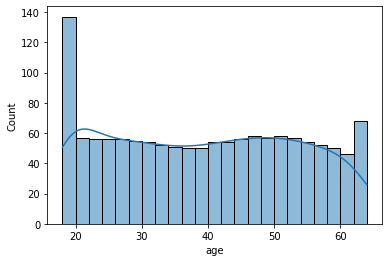

In [137]:
print(f"minimum age: {df['age'].min()}, maximum age: {df['age'].max()}")
sns.histplot(df, x = "age", bins = 23, kde = True)
plt.show()

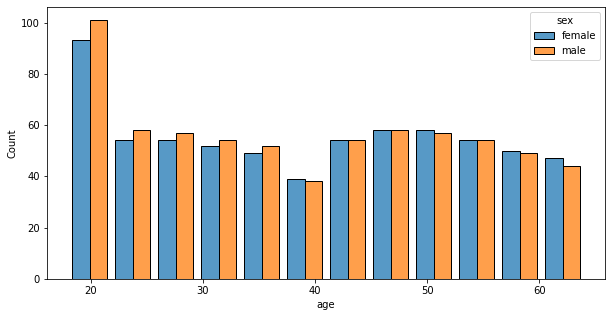

In [138]:
plt.figure(figsize = (10, 5))
sns.histplot(df, x = "age", hue = "sex", multiple = "dodge", shrink = .8)
plt.show()

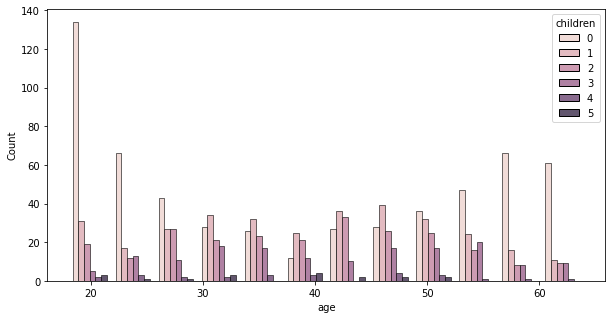

In [139]:
plt.figure(figsize = (10, 5))
sns.histplot(df, x = "age", hue = "children", multiple = "dodge", shrink = .8)
plt.show()

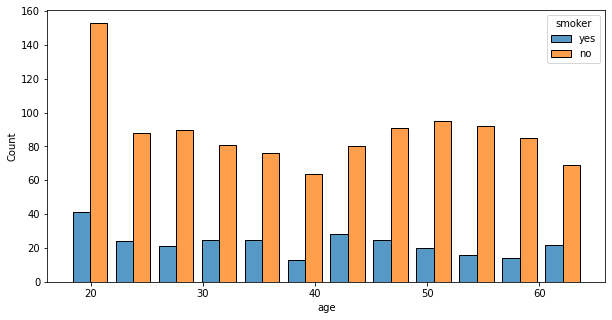

In [140]:
plt.figure(figsize = (10, 5))
sns.histplot(df, x = "age", hue = "smoker", multiple = "dodge", shrink = .8)
plt.show()

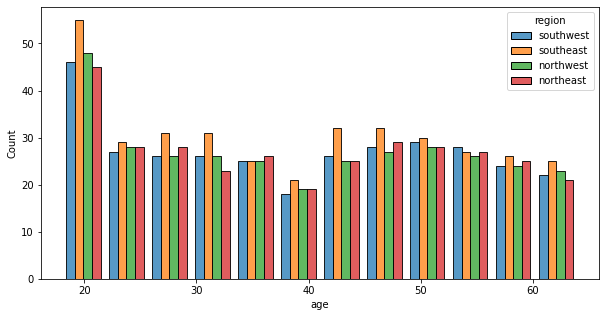

In [141]:
plt.figure(figsize = (10, 5))
sns.histplot(df, x = "age", hue = "region", multiple = "dodge", shrink = .8)
plt.show()

#### bmi

minimum BMI: 15.96, maximum BMI: 53.13


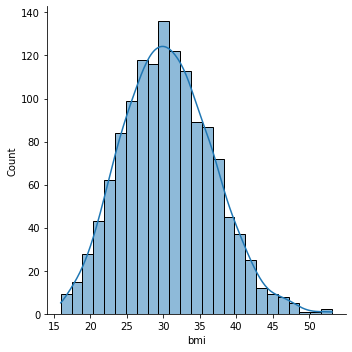

In [142]:
print(f"minimum BMI: {df['bmi'].min()}, maximum BMI: {df['bmi'].max()}")
sns.displot(df, x = "bmi", kde = True)
plt.show()

<Figure size 720x360 with 0 Axes>

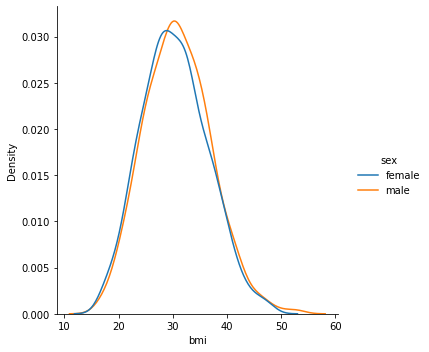

In [143]:
plt.figure(figsize = (10, 5))
sns.displot(df, x = "bmi", hue = "sex", kind = "kde")
plt.show()

<Figure size 720x360 with 0 Axes>

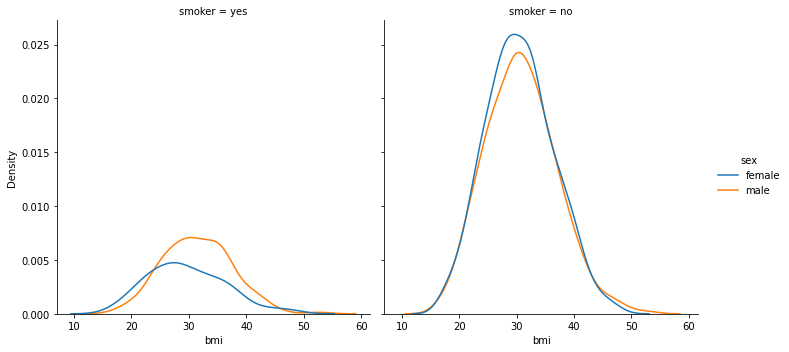

In [144]:
plt.figure(figsize = (10, 5))
sns.displot(df, x = "bmi", hue = "sex", kind = "kde", col = "smoker")
plt.show()

<Figure size 720x504 with 0 Axes>

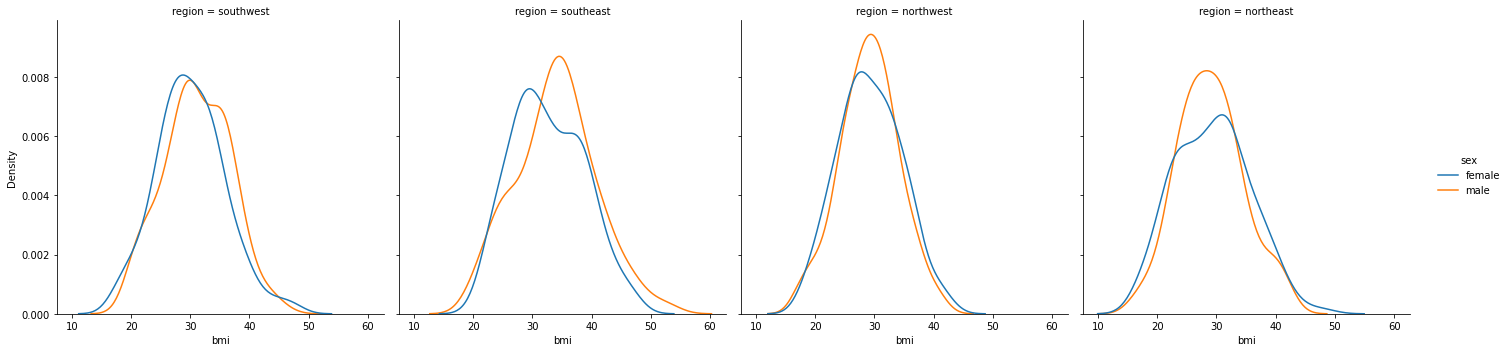

In [145]:
plt.figure(figsize = (10, 7))
sns.displot(df, x = "bmi", hue = "sex", kind = "kde", col = "region")
plt.show()

#### region

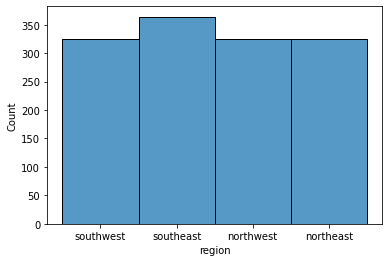

In [146]:
sns.histplot(df, x = "region")
plt.show()

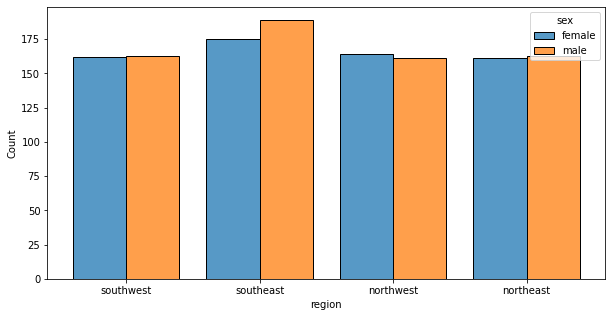

In [147]:
plt.figure(figsize = (10, 5))
sns.histplot(df, x = "region", hue = "sex", multiple = "dodge", shrink = .8)
plt.show()

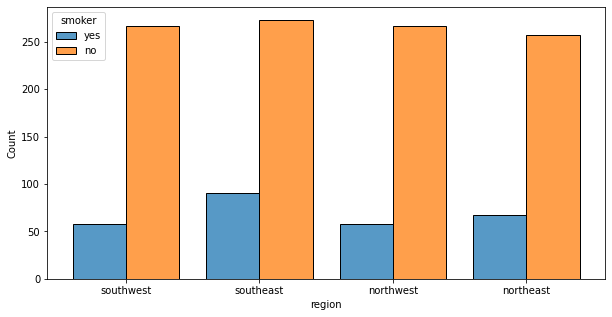

In [148]:
plt.figure(figsize = (10, 5))
sns.histplot(df, x = "region", hue = "smoker", multiple = "dodge", shrink = .8)
plt.show()

#### charges

minimum charge: 1121.8739, maximum charge: 63770.42801


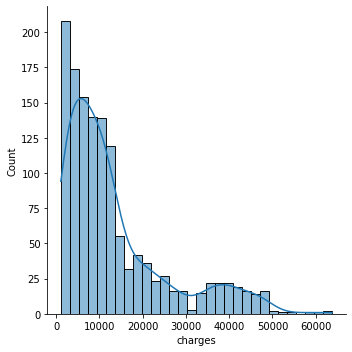

In [149]:
print(f"minimum charge: {df['charges'].min()}, maximum charge: {df['charges'].max()}")
sns.displot(df, x = "charges", kde = True)
plt.show()

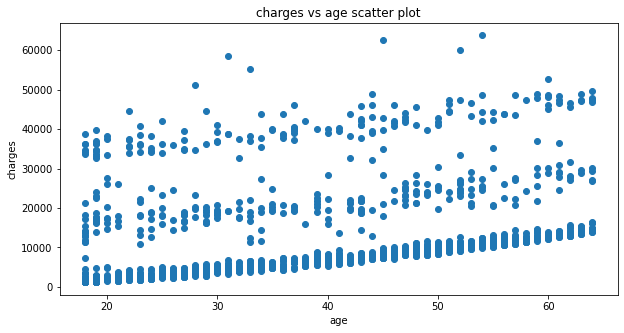

In [150]:
plt.figure(figsize = (10, 5))
plt.scatter(df["age"], df["charges"])
plt.xlabel("age")
plt.ylabel("charges")
plt.title("charges vs age scatter plot")
plt.show()

<Figure size 720x360 with 0 Axes>

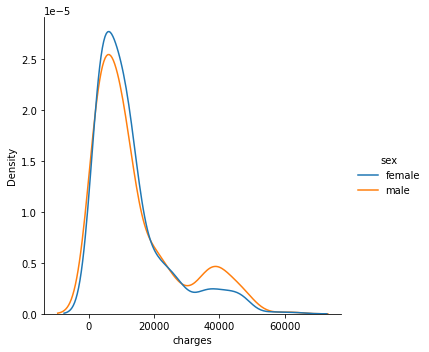

In [151]:
plt.figure(figsize = (10, 5))
sns.displot(df, x = "charges", hue = "sex", kind = "kde")
plt.show()

<Figure size 720x360 with 0 Axes>

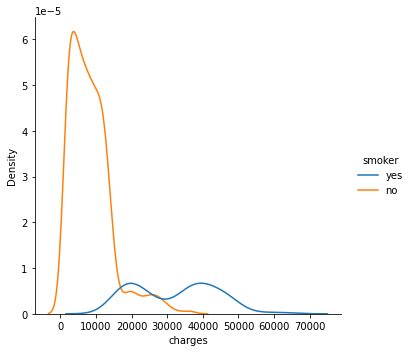

In [152]:
plt.figure(figsize = (10, 5))
sns.displot(df, x = "charges", hue = "smoker", kind = "kde")
plt.show()

<Figure size 720x504 with 0 Axes>

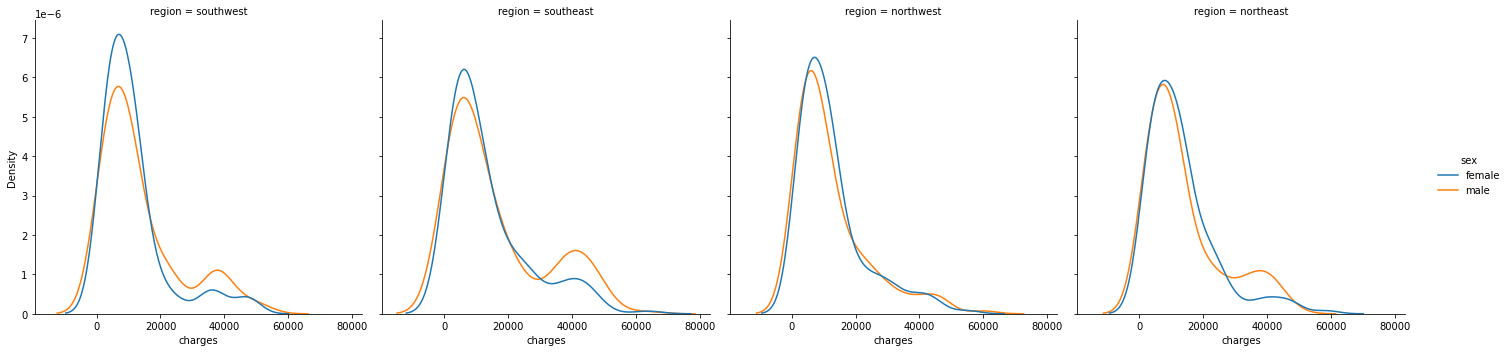

In [153]:
plt.figure(figsize = (10, 7))
sns.displot(df, x = "charges", hue = "sex", kind = "kde", col = "region")
plt.show()

In [154]:
df_expanded = pd.get_dummies(df)
df_expanded.drop(columns = ["sex_male", "smoker_no"], inplace = True)
df_expanded.head()

,age,bmi,children,charges,sex_female,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,1,0,0,0,1
1,18,33.770,1,1725.55230,0,0,0,0,1,0
2,28,33.000,3,4449.46200,0,0,0,0,1,0
3,33,22.705,0,21984.47061,0,0,0,1,0,0
4,32,28.880,0,3866.85520,0,0,0,1,0,0


In [155]:
train, test = train_test_split(df_expanded, test_size = .25)

train.shape, test.shape

((1003, 10), (335, 10))

In [156]:
x_train = train.drop(columns = ["charges"])
x_test = test.drop(columns = ["charges"])
y_train = np.array(train["charges"]).reshape(-1, 1)
y_test = np.array(test["charges"]).reshape(-1, 1)

x_scaler = StandardScaler()
y_scaler = StandardScaler()

x_scaler.fit(x_train)
y_scaler.fit(y_train)

x_train_scaled = x_scaler.transform(x_train)
x_test_scaled = x_scaler.transform(x_test)

y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)


x_train_scaled.shape, x_test_scaled.shape, y_train_scaled.shape, y_test_scaled.shape

((1003, 9), (335, 9), (1003, 1), (335, 1))

# Linear Regression

In [157]:
model = ElasticNet()
params = {"alpha": [.00001, .000033, .0001, .00033, .001, .0033, .01, .033, .1, .33, 1, 3.3, 10, 33, 100], 
          "l1_ratio" : [0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1]}
gridsearch = GridSearchCV(model, params, scoring = "neg_mean_absolute_percentage_error", n_jobs = -1, 
                          cv = 5, return_train_score = True, verbose = 1)
gridsearch.fit(x_train_scaled, y_train_scaled)

Fitting 5 folds for each of 165 candidates, totalling 825 fits


GridSearchCV(cv=5, estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': [1e-05, 3.3e-05, 0.0001, 0.00033, 0.001,
                                   0.0033, 0.01, 0.033, 0.1, 0.33, 1, 3.3, 10,
                                   33, 100],
                         'l1_ratio': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                      0.9, 1]},
             return_train_score=True,
             scoring='neg_mean_absolute_percentage_error', verbose=1)

In [158]:
results = pd.DataFrame.from_dict(gridsearch.cv_results_)
results["mean_test_score"] = results["mean_test_score"].apply(abs)
results["mean_train_score"] = results["mean_train_score"].apply(abs)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.012809,0.000781,0.000800,0.000080,1e-05,0,"{'alpha': 1e-05, 'l1_ratio': 0}",-0.946802,-1.314831,-1.742036,-1.091402,-1.174404,1.253895,0.271670,162,-1.258837,-1.256544,-1.069290,-1.191797,-1.115751,1.178444,0.075612
1,0.014201,0.001774,0.000802,0.000145,1e-05,0.1,"{'alpha': 1e-05, 'l1_ratio': 0.1}",-0.946796,-1.314825,-1.742031,-1.091396,-1.174398,1.253889,0.271671,161,-1.258833,-1.256540,-1.069285,-1.191793,-1.115747,1.178440,0.075612
2,0.013300,0.004234,0.002714,0.003190,1e-05,0.2,"{'alpha': 1e-05, 'l1_ratio': 0.2}",-0.946790,-1.314819,-1.742030,-1.091390,-1.174392,1.253884,0.271672,160,-1.258828,-1.256537,-1.069281,-1.191788,-1.115743,1.178436,0.075612
3,0.003058,0.002222,0.000777,0.000148,1e-05,0.3,"{'alpha': 1e-05, 'l1_ratio': 0.3}",-0.946784,-1.314812,-1.742027,-1.091383,-1.174386,1.253878,0.271674,159,-1.258824,-1.256534,-1.069277,-1.191784,-1.115739,1.178431,0.075613
4,0.003390,0.003711,0.000636,0.000099,1e-05,0.4,"{'alpha': 1e-05, 'l1_ratio': 0.4}",-0.946778,-1.314805,-1.742022,-1.091377,-1.174380,1.253872,0.271674,157,-1.258819,-1.256531,-1.069272,-1.191779,-1.115734,1.178427,0.075613


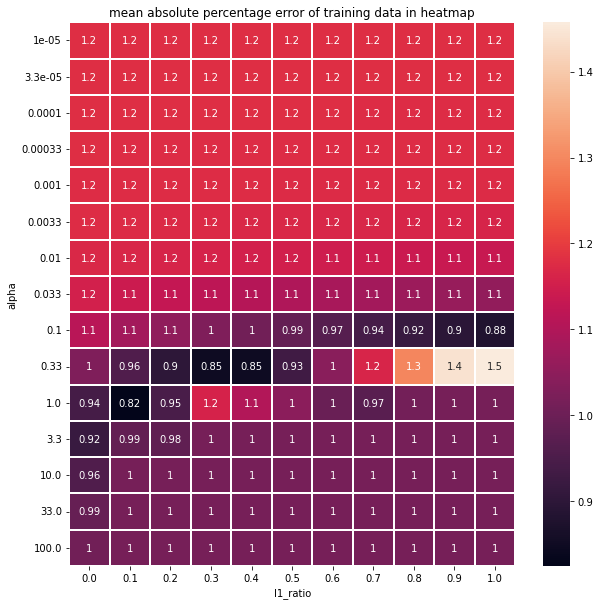

In [159]:
hmap = results.pivot("param_alpha", "param_l1_ratio", "mean_train_score")
plt.figure(figsize = (10, 10))
sns.heatmap(hmap, linewidth = 1, annot = True)
plt.xlabel("l1_ratio")
plt.ylabel("alpha")
plt.title("mean absolute percentage error of training data in heatmap")
plt.show()

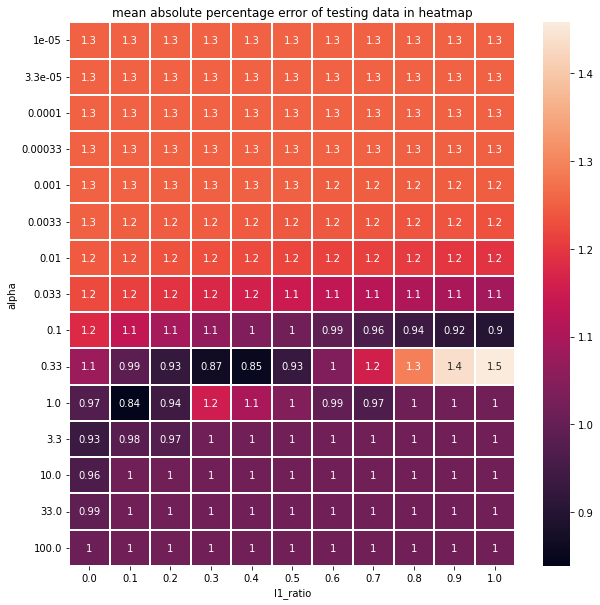

In [160]:
hmap = results.pivot("param_alpha", "param_l1_ratio", "mean_test_score")
plt.figure(figsize = (10, 10))
sns.heatmap(hmap, linewidth = 1, annot = True)
plt.xlabel("l1_ratio")
plt.ylabel("alpha")
plt.title("mean absolute percentage error of testing data in heatmap")
plt.show()

In [161]:
l1_ratio = .1
alpha = 1

In [162]:
model = ElasticNet(l1_ratio = l1_ratio, alpha = alpha)
model.fit(x_train_scaled, y_train_scaled)

y_pred_scaled = model.predict(x_test_scaled)
y_pred = y_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))

mean_squared_error(y_test, y_pred, squared = False), mean_absolute_percentage_error(y_test, y_pred)

(8236.381330643831, 1.0274701238925095)

In [163]:
importance = pd.DataFrame()
importance["feature_name"] = train.drop(columns = ["charges"]).columns
importance["coefficient"] = model.coef_
importance["sbs_coefficient"] = importance["coefficient"].apply(abs)
importance.sort_values(by = ["sbs_coefficient"], ascending = False, ignore_index = True, inplace = True)
importance

,feature_name,coefficient,sbs_coefficient
0,smoker_yes,0.361868,0.361868
1,age,0.104410,0.104410
2,bmi,0.040893,0.040893
3,children,0.000000,0.000000
4,sex_female,-0.000000,0.000000
5,region_northeast,0.000000,0.000000
6,region_northwest,-0.000000,0.000000
7,region_southeast,0.000000,0.000000
8,region_southwest,-0.000000,0.000000


# kNN Regressor

In [164]:
model = KNeighborsRegressor()
params = {"n_neighbors" : [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45], 
          "weights" : ["uniform", "distance"]}
gridsearch = GridSearchCV(model, params, scoring = "neg_mean_absolute_percentage_error", n_jobs = -1, 
                          cv = 5, return_train_score = True, verbose = 1)
gridsearch.fit(x_train_scaled, y_train_scaled)

Fitting 5 folds for each of 46 candidates, totalling 230 fits


GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                         23, 25, 27, 29, 31, 33, 35, 37, 39, 41,
                                         43, 45],
                         'weights': ['uniform', 'distance']},
             return_train_score=True,
             scoring='neg_mean_absolute_percentage_error', verbose=1)

In [165]:
results = pd.DataFrame.from_dict(gridsearch.cv_results_)
results["mean_test_score"] = results["mean_test_score"].apply(abs)
results["mean_train_score"] = results["mean_train_score"].apply(abs)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002494,0.001160,0.004274,0.002633,1,uniform,"{'n_neighbors': 1, 'weights': 'uniform'}",-1.019163,-0.717218,-1.717700,-1.022626,-1.511960,1.197733,0.364019,45,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000
1,0.002109,0.000598,0.005697,0.003463,1,distance,"{'n_neighbors': 1, 'weights': 'distance'}",-1.019163,-0.717218,-1.717700,-1.022626,-1.511960,1.197733,0.364019,45,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000
2,0.004929,0.003963,0.004654,0.001901,3,uniform,"{'n_neighbors': 3, 'weights': 'uniform'}",-1.087600,-1.062690,-1.439702,-1.066624,-1.322072,1.195738,0.155913,44,-0.638683,-0.792149,-0.693243,-0.714849,-0.678075,0.703400,0.050873
3,0.003362,0.002728,0.006140,0.002923,3,distance,"{'n_neighbors': 3, 'weights': 'distance'}",-1.006194,-0.899323,-1.499428,-0.843835,-1.239314,1.097619,0.242328,42,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000
4,0.002576,0.000971,0.008463,0.004308,5,uniform,"{'n_neighbors': 5, 'weights': 'uniform'}",-1.030199,-1.069156,-1.530751,-0.877847,-1.087463,1.119083,0.218659,43,-0.800191,-0.943025,-0.797906,-0.873220,-0.864403,0.855749,0.053721


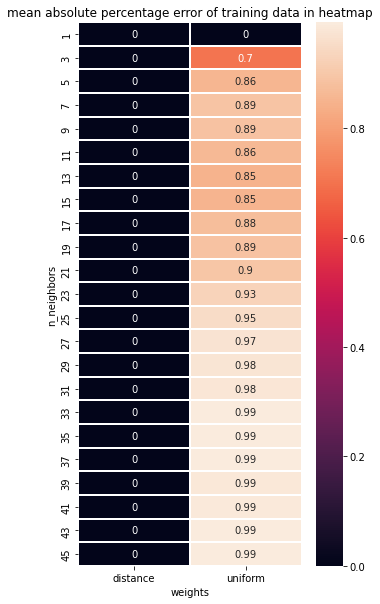

In [166]:
hmap = results.pivot("param_n_neighbors", "param_weights", "mean_train_score")
plt.figure(figsize = (5, 10))
sns.heatmap(hmap, linewidth = 1, annot = True)
plt.ylabel("n_neighbors")
plt.xlabel("weights")
plt.title("mean absolute percentage error of training data in heatmap")
plt.show()

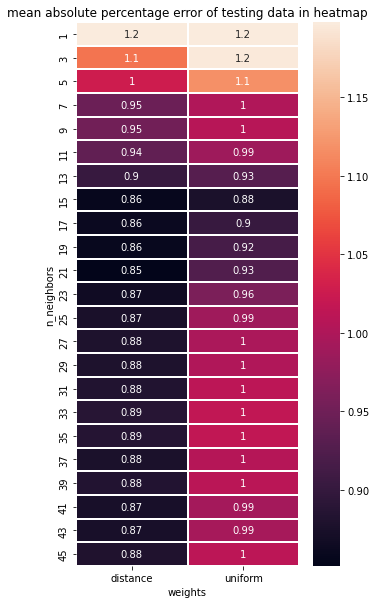

In [167]:
hmap = results.pivot("param_n_neighbors", "param_weights", "mean_test_score")
plt.figure(figsize = (5, 10))
sns.heatmap(hmap, linewidth = 1, annot = True)
plt.xlabel("weights")
plt.ylabel("n_neighbors")
plt.title("mean absolute percentage error of testing data in heatmap")
plt.show()

In [168]:
n_neighbors = 17
weights = "distance"

In [169]:
model = KNeighborsRegressor(n_neighbors = n_neighbors, weights = weights)
model.fit(x_train_scaled, y_train_scaled)

y_pred_scaled = model.predict(x_test_scaled)
y_pred = y_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))

mean_squared_error(y_test, y_pred, squared = False), mean_absolute_percentage_error(y_test, y_pred)

(5181.400672814172, 0.3361704654922479)

# SVM Regressor

In [171]:
model = SVR()
params = {"kernel" : ["linear", "poly", "rbf", "sigmoid"], 
          "C" : [.00001, .000033, .0001, .00033, .001, .0033, .01, .033, .1, .33, 1, 3.3, 10, 33, 100]}
gridsearch = GridSearchCV(model, params, scoring = "neg_mean_absolute_percentage_error", n_jobs = -1, 
                          cv = 5, return_train_score = True, verbose = 1)
gridsearch.fit(x_train_scaled, y_train_scaled)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [1e-05, 3.3e-05, 0.0001, 0.00033, 0.001, 0.0033,
                               0.01, 0.033, 0.1, 0.33, 1, 3.3, 10, 33, 100],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             return_train_score=True,
             scoring='neg_mean_absolute_percentage_error', verbose=1)

In [172]:
results = pd.DataFrame.from_dict(gridsearch.cv_results_)
results["mean_test_score"] = results["mean_test_score"].apply(abs)
results["mean_train_score"] = results["mean_train_score"].apply(abs)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.073287,0.016289,0.014055,0.003910,1e-05,linear,"{'C': 1e-05, 'kernel': 'linear'}",-1.602322,-1.864443,-2.084756,-1.544041,-2.001255,1.819364,0.213757,46,-1.795147,-1.699584,-1.801894,-1.929070,-1.856752,1.816490,0.075672
1,0.073280,0.015489,0.012504,0.003815,1e-05,poly,"{'C': 1e-05, 'kernel': 'poly'}",-1.610175,-1.884743,-2.102190,-1.549417,-2.023610,1.834027,0.219790,54,-1.804927,-1.714818,-1.817917,-1.937981,-1.876027,1.830334,0.074591
2,0.108935,0.022291,0.031365,0.007810,1e-05,rbf,"{'C': 1e-05, 'kernel': 'rbf'}",-1.610115,-1.884485,-2.100441,-1.549239,-2.023294,1.833515,0.219356,53,-1.804996,-1.714651,-1.816370,-1.937799,-1.875798,1.829923,0.074612
3,0.121527,0.026671,0.022431,0.010093,1e-05,sigmoid,"{'C': 1e-05, 'kernel': 'sigmoid'}",-1.609590,-1.884673,-2.099991,-1.548957,-2.022153,1.833073,0.219238,52,-1.804340,-1.714969,-1.815955,-1.937367,-1.874833,1.829493,0.074329
4,0.068766,0.017754,0.010764,0.003570,3.3e-05,linear,"{'C': 3.3e-05, 'kernel': 'linear'}",-1.566076,-1.815025,-2.050311,-1.522445,-1.951899,1.781151,0.207815,41,-1.749157,-1.662272,-1.769700,-1.894583,-1.813712,1.777885,0.076368


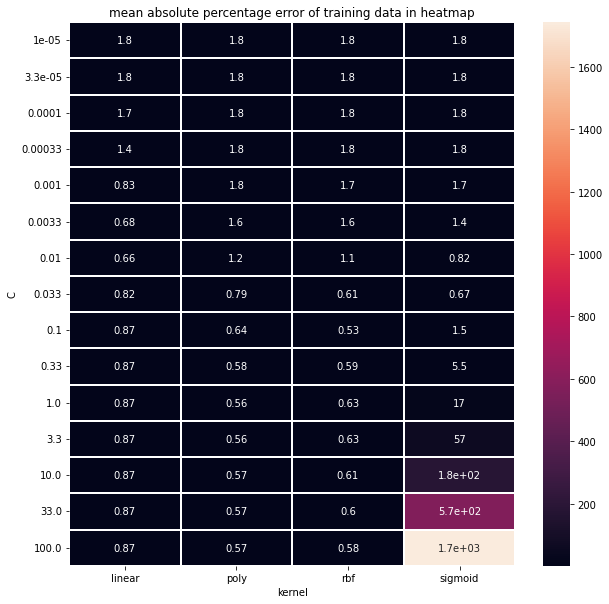

In [173]:
hmap = results.pivot("param_C", "param_kernel", "mean_train_score")
plt.figure(figsize = (10, 10))
sns.heatmap(hmap, linewidth = 1, annot = True)
plt.xlabel("kernel")
plt.ylabel("C")
plt.title("mean absolute percentage error of training data in heatmap")
plt.show()

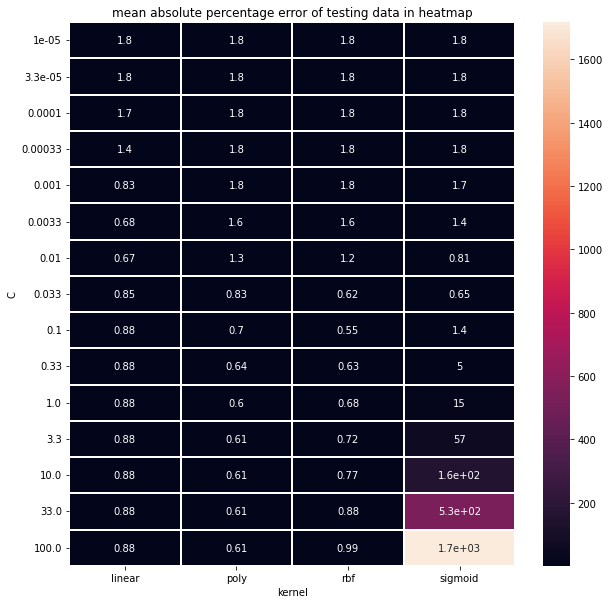

In [174]:
hmap = results.pivot("param_C", "param_kernel", "mean_test_score")
plt.figure(figsize = (10, 10))
sns.heatmap(hmap, linewidth = 1, annot = True)
plt.xlabel("kernel")
plt.ylabel("C")
plt.title("mean absolute percentage error of testing data in heatmap")
plt.show()

In [179]:
C = 1
kernel = "poly"

In [180]:
model = SVR(C = C, kernel = kernel)
model.fit(x_train_scaled, y_train_scaled)

y_pred_scaled = model.predict(x_test_scaled)
y_pred = y_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))

mean_squared_error(y_test, y_pred, squared = False), mean_absolute_percentage_error(y_test, y_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(4542.235540327942, 0.21942102560979376)

# Random Forest Regressor

In [189]:
model = RandomForestRegressor(max_depth = None)
params = {"n_estimators" : [1, 5, 10, 25, 50, 75, 100], 
          "max_features" : ["auto", None, "sqrt", "log2"]}
gridsearch = GridSearchCV(model, params, scoring = "neg_mean_absolute_percentage_error", n_jobs = -1, 
                          cv = 5, return_train_score = True, verbose = 1)
gridsearch.fit(x_train_scaled, y_train_scaled)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_features': ['auto', None, 'sqrt', 'log2'],
                         'n_estimators': [1, 5, 10, 25, 50, 75, 100]},
             return_train_score=True,
             scoring='neg_mean_absolute_percentage_error', verbose=1)

In [190]:
results = pd.DataFrame.from_dict(gridsearch.cv_results_)
results["mean_test_score"] = results["mean_test_score"].apply(abs)
results["mean_train_score"] = results["mean_train_score"].apply(abs)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.008363,0.002873,0.004108,0.003595,auto,1,"{'max_features': 'auto', 'n_estimators': 1}",-0.880533,-0.790374,-1.141681,-0.745395,-0.736405,0.858877,0.150344,6,-0.478710,-0.350643,-0.344481,-0.401468,-0.468316,0.408724,0.056573
1,0.045544,0.018734,0.002360,0.000166,auto,5,"{'max_features': 'auto', 'n_estimators': 5}",-0.614638,-0.742547,-1.319507,-0.987214,-1.345877,1.001957,0.295515,20,-0.407632,-0.375963,-0.488286,-0.550520,-0.397777,0.444036,0.065415
2,0.075160,0.018712,0.007233,0.005281,auto,10,"{'max_features': 'auto', 'n_estimators': 10}",-0.894729,-0.654811,-0.981296,-0.946649,-1.329652,0.961428,0.216640,17,-0.324314,-0.374965,-0.376905,-0.370145,-0.362251,0.361716,0.019372
3,0.190835,0.041247,0.007954,0.003094,auto,25,"{'max_features': 'auto', 'n_estimators': 25}",-0.857319,-0.738002,-1.375440,-0.797992,-1.151873,0.984125,0.241896,18,-0.335875,-0.409650,-0.332257,-0.310328,-0.322731,0.342169,0.034881
4,0.371731,0.068872,0.020360,0.006461,auto,50,"{'max_features': 'auto', 'n_estimators': 50}",-0.806790,-0.858430,-0.972492,-0.721078,-1.041393,0.880037,0.114616,8,-0.313340,-0.368013,-0.299245,-0.355191,-0.334094,0.333977,0.025459


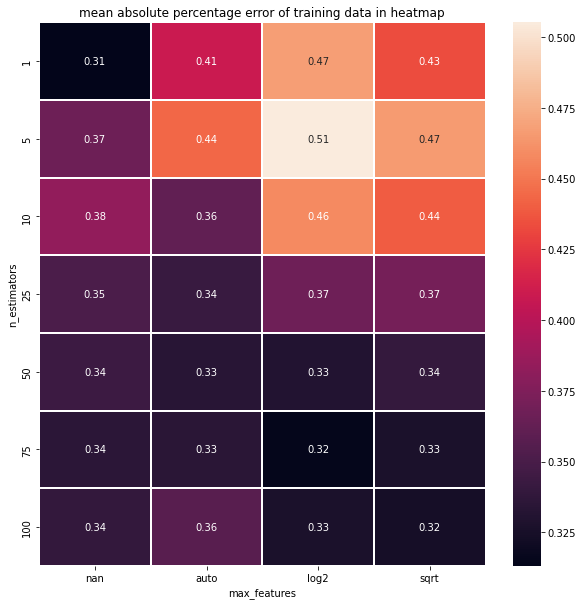

In [191]:
hmap = results.pivot("param_n_estimators", "param_max_features", "mean_train_score")
plt.figure(figsize = (10, 10))
sns.heatmap(hmap, linewidth = 1, annot = True)
plt.xlabel("max_features")
plt.ylabel("n_estimators")
plt.title("mean absolute percentage error of training data in heatmap")
plt.show()

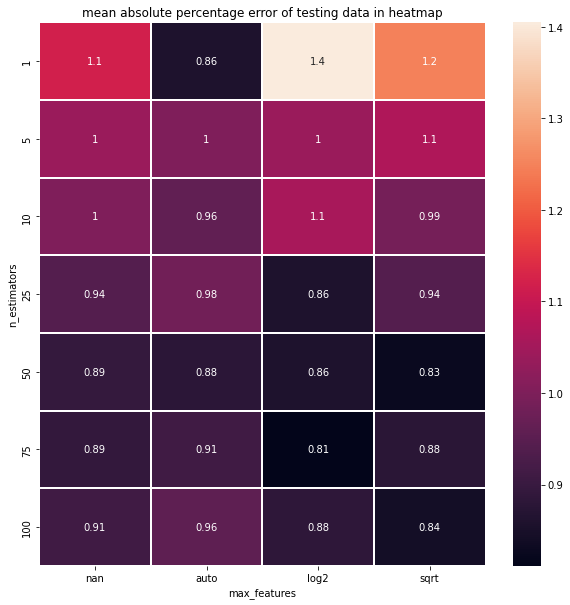

In [192]:
hmap = results.pivot("param_n_estimators", "param_max_features", "mean_test_score")
plt.figure(figsize = (10, 10))
sns.heatmap(hmap, linewidth = 1, annot = True)
plt.xlabel("max_features")
plt.ylabel("n_estimators")
plt.title("mean absolute percentage error of testing data in heatmap")
plt.show()

In [198]:
max_features = "log2"
n_estimators = 75

In [199]:
model = RandomForestRegressor(n_estimators = n_estimators, max_features = max_features)
model.fit(x_train_scaled, y_train_scaled.ravel())

y_pred_scaled = model.predict(x_test_scaled)
y_pred = y_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))

mean_squared_error(y_test, y_pred, squared = False), mean_absolute_percentage_error(y_test, y_pred)

(4202.382440075044, 0.294759400642721)

In [201]:
importance = pd.DataFrame()
importance["feature_name"] = train.drop(columns = ["charges"]).columns
importance["coefficient"] = model.feature_importances_
importance.sort_values(by = ["coefficient"], ascending = False, ignore_index = True, inplace = True)
importance

,feature_name,coefficient
0,smoker_yes,0.603329
1,bmi,0.173510
2,age,0.154591
3,children,0.029545
4,sex_female,0.012471
5,region_northwest,0.006747
6,region_southeast,0.006686
7,region_northeast,0.006660
8,region_southwest,0.006461


# XGBoost Regressor

In [203]:
model = xgb.XGBRegressor()
params = {"n_estimators" : [1, 5, 10, 25, 50, 75, 100], 
          "max_depth" : [4, 8, 16, 32]}
gridsearch = GridSearchCV(model, params, scoring = "neg_mean_absolute_percentage_error", n_jobs = -1, 
                          cv = 5, return_train_score = True, verbose = 1)
gridsearch.fit(x_train_scaled, y_train_scaled)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
[15:45:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=5, estimator=XGBRegressor(), n_jobs=-1,
             param_grid={'max_depth': [4, 8, 16, 32],
                         'n_estimators': [1, 5, 10, 25, 50, 75, 100]},
             return_train_score=True,
             scoring='neg_mean_absolute_percentage_error', verbose=1)

In [204]:
results = pd.DataFrame.from_dict(gridsearch.cv_results_)
results["mean_test_score"] = results["mean_test_score"].apply(abs)
results["mean_train_score"] = results["mean_train_score"].apply(abs)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.070857,0.069306,0.002200,0.002237,4,1,"{'max_depth': 4, 'n_estimators': 1}",-2.741412,-3.343005,-3.155609,-2.540628,-3.385973,3.033325,0.335613,25,-3.091152,-2.972925,-2.978830,-3.161677,-2.963362,3.033589,0.079159
1,0.018434,0.002978,0.000978,0.000106,4,5,"{'max_depth': 4, 'n_estimators': 5}",-1.940428,-2.437111,-2.260515,-1.728746,-2.501525,2.173665,0.295564,21,-2.174294,-2.147087,-2.113701,-2.269433,-2.125734,2.166050,0.055644
2,0.026164,0.004425,0.002436,0.002891,4,10,"{'max_depth': 4, 'n_estimators': 10}",-1.393079,-1.747086,-1.712168,-1.287276,-1.820105,1.591943,0.211163,17,-1.497294,-1.598893,-1.541894,-1.672174,-1.536595,1.569370,0.060769
3,0.059641,0.017231,0.008835,0.008567,4,25,"{'max_depth': 4, 'n_estimators': 25}",-0.833226,-0.915923,-1.063476,-0.792722,-1.093268,0.939723,0.120340,4,-0.747789,-0.928036,-0.842278,-0.928553,-0.851618,0.859655,0.066788
4,0.107633,0.007523,0.004722,0.004129,4,50,"{'max_depth': 4, 'n_estimators': 50}",-0.766342,-0.783023,-0.874360,-0.722610,-0.968342,0.822935,0.087919,1,-0.554233,-0.780302,-0.634083,-0.732560,-0.651856,0.670607,0.078867


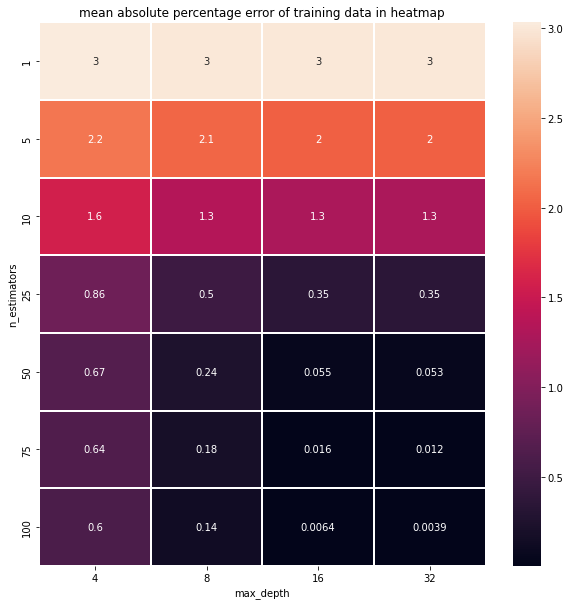

In [205]:
hmap = results.pivot("param_n_estimators", "param_max_depth", "mean_train_score")
plt.figure(figsize = (10, 10))
sns.heatmap(hmap, linewidth = 1, annot = True)
plt.xlabel("max_depth")
plt.ylabel("n_estimators")
plt.title("mean absolute percentage error of training data in heatmap")
plt.show()

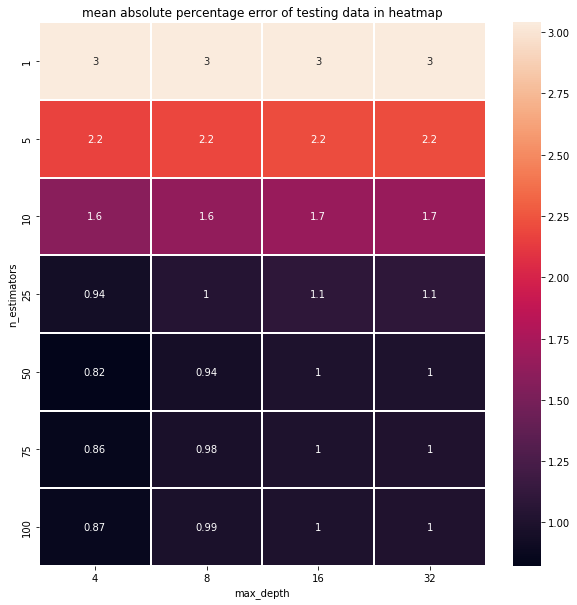

In [206]:
hmap = results.pivot("param_n_estimators", "param_max_depth", "mean_test_score")
plt.figure(figsize = (10, 10))
sns.heatmap(hmap, linewidth = 1, annot = True)
plt.xlabel("max_depth")
plt.ylabel("n_estimators")
plt.title("mean absolute percentage error of testing data in heatmap")
plt.show()

In [207]:
n_estimators = 50
max_depth = 4

In [208]:
model = xgb.XGBRegressor(n_estimators = n_estimators, max_depth = max_depth)
model.fit(x_train_scaled, y_train_scaled.ravel())

y_pred_scaled = model.predict(x_test_scaled)
y_pred = y_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))

mean_squared_error(y_test, y_pred, squared = False), mean_absolute_percentage_error(y_test, y_pred)

[15:48:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(4027.2598450475857, 0.27695614664775536)